In [1]:
from bs4 import BeautifulSoup
import pandas as pd
from splinter import Browser
import time  

In [2]:

# Initialize the Splinter Browser
browser = Browser('chrome')

# Visit the Mars Weather page
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

In [3]:

# Wait for a few seconds for the page to load
time.sleep(3)

# Get the HTML content of the page
html = browser.html

# Create a BeautifulSoup object
soup = BeautifulSoup(html, 'html.parser')

# Find the HTML table containing the data
table = soup.find('table', class_='table')



In [4]:

if table:
    # Extract data from the table
    data = []

    # Extracting column headings
    headers = [header.text.strip() for header in table.find_all('th')]

    # Extracting data rows
    for row in table.find_all('tr')[1:]:  # Skip the first row as it contains headers
        row_data = [cell.text.strip() for cell in row.find_all(['th', 'td'])]
        data.append(row_data)

    # Create a Pandas DataFrame
    df = pd.DataFrame(data, columns=headers)

    # Close the browser
    browser.quit()

    # Display the DataFrame with a more formatted table
    df_styled = df.style.set_table_styles([
        {'selector': 'thead', 'props': [('background-color', '#3f5185'), ('color', 'white')]},
        {'selector': 'tbody', 'props': [('background-color', '#f0f0f0')]},
        {'selector': 'th', 'props': [('text-align', 'center'), ('padding', '8px'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('text-align', 'center'), ('padding', '8px')]},
    ])

    # Display the styled DataFrame
    display(df_styled)

    # Print data types of each column
    print(df.dtypes)

    # Convert columns to appropriate data types if needed
    df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])
    df['sol'] = df['sol'].astype(int)
    df['ls'] = df['ls'].astype(float)
    df['month'] = df['month'].astype(int)
    df['min_temp'] = df['min_temp'].astype(float)
    df['pressure'] = df['pressure'].astype(float)

    # Display the DataFrame after data type conversion
    df_styled = df.style.format({'terrestrial_date': '{:%Y-%m-%d}'}).set_table_styles([
        {'selector': 'thead', 'props': [('background-color', '#3f5185'), ('color', 'white')]},
        {'selector': 'tbody', 'props': [('background-color', '#f0f0f0')]},
        {'selector': 'th', 'props': [('text-align', 'center'), ('padding', '8px'), ('font-weight', 'bold')]},
        {'selector': 'td', 'props': [('text-align', 'center'), ('padding', '8px')]},
    ])

    # Display the styled DataFrame after data type conversion
    display(df_styled)

    # Print data types of each column after conversion
    print(df.dtypes)

else:
    print("Table not found on the webpage.")


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
5,57,2012-08-21,15,158,6,-78.0,740.0
6,68,2012-08-22,16,158,6,-77.0,740.0
7,79,2012-08-23,17,159,6,-76.0,742.0
8,112,2012-08-27,21,161,6,-74.0,741.0
9,114,2012-08-28,22,162,6,-74.0,742.0


id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155.000000,6,-75.000000,739.000000
1,13,2012-08-17,11,156.000000,6,-76.000000,740.000000
2,24,2012-08-18,12,156.000000,6,-76.000000,741.000000
3,35,2012-08-19,13,157.000000,6,-74.000000,732.000000
4,46,2012-08-20,14,157.000000,6,-74.000000,740.000000
5,57,2012-08-21,15,158.000000,6,-78.000000,740.000000
6,68,2012-08-22,16,158.000000,6,-77.000000,740.000000
7,79,2012-08-23,17,159.000000,6,-76.000000,742.000000
8,112,2012-08-27,21,161.000000,6,-74.000000,741.000000
9,114,2012-08-28,22,162.000000,6,-74.000000,742.000000


id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                         float64
month                        int32
min_temp                   float64
pressure                   float64
dtype: object


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# How many months exist on Mars?
num_months_on_mars = df['month'].nunique()
print(f"There are {num_months_on_mars} months on Mars")

There are 12 months on Mars


In [7]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
num_martian_days = df['sol'].nunique()
print(f"There are {num_martian_days} number of Martian days in the dataset")

There are 1867 number of Martian days in the dataset


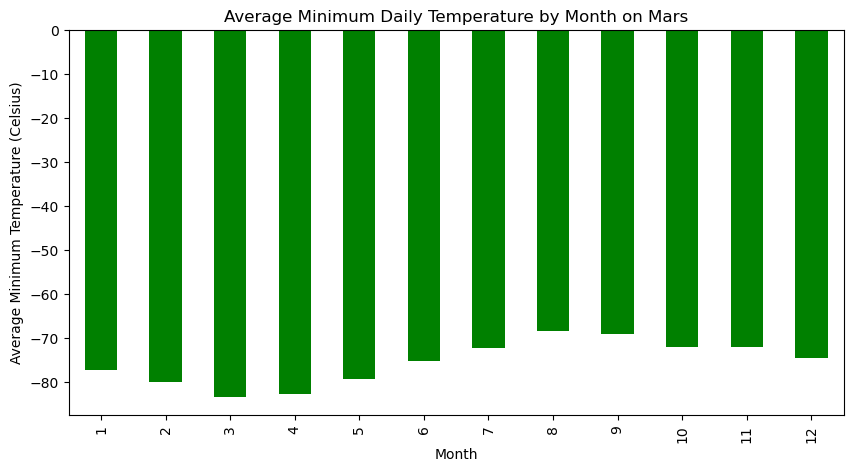

Coldest month on Mars: 3
Warmest month on Mars: 8


In [8]:
# Find the coldest and warmest months on Mars
# Convert 'min_temp' column to numeric (if not already)
df['min_temp'] = pd.to_numeric(df['min_temp'], errors='coerce')
# Find average minimum daily temperature for each month
average_min_temp_by_month = df.groupby('month')['min_temp'].mean()
# Plot the results as a bar chart
plt.figure(figsize=(10, 5))
average_min_temp_by_month.plot(kind='bar', color='green')
plt.title('Average Minimum Daily Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (Celsius)')
plt.show()

# Identify coldest and warmest months
coldest_month = average_min_temp_by_month.idxmin()
warmest_month = average_min_temp_by_month.idxmax()

print(f"Coldest month on Mars: {coldest_month}")
print(f"Warmest month on Mars: {warmest_month}")

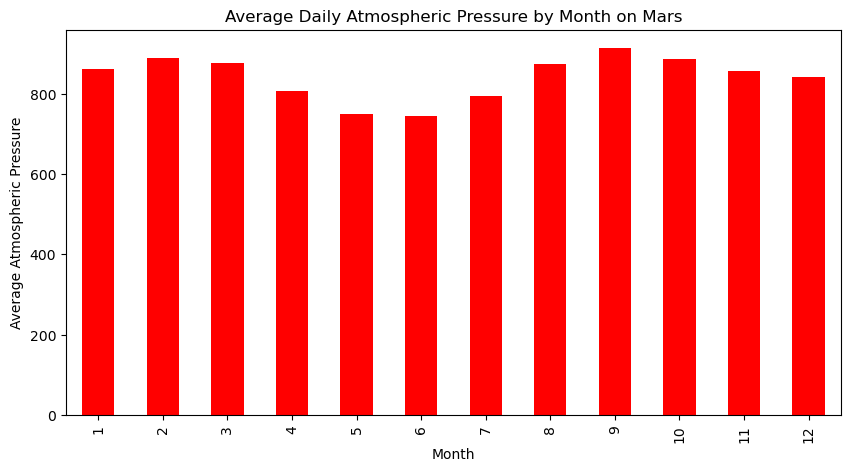

Month with the lowest atmospheric pressure on Mars: 6
Month with the highest atmospheric pressure on Mars: 9


In [9]:
# Which months have the lowest and highest atmospheric pressure on Mars?
# Convert 'pressure' column to numeric (if not already)
df['pressure'] = pd.to_numeric(df['pressure'], errors='coerce')

# Find average daily atmospheric pressure for each month
average_pressure_by_month = df.groupby('month')['pressure'].mean()

# Plot the results on bar chart
plt.figure(figsize=(10, 5))
average_pressure_by_month.plot(kind='bar', color='red')
plt.title('Average Daily Atmospheric Pressure by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.show()

# Identify months with lowest and highest atmospheric pressure
lowest_pressure_month = average_pressure_by_month.idxmin()
highest_pressure_month = average_pressure_by_month.idxmax()

print(f"Month with the lowest atmospheric pressure on Mars: {lowest_pressure_month}")
print(f"Month with the highest atmospheric pressure on Mars: {highest_pressure_month}")

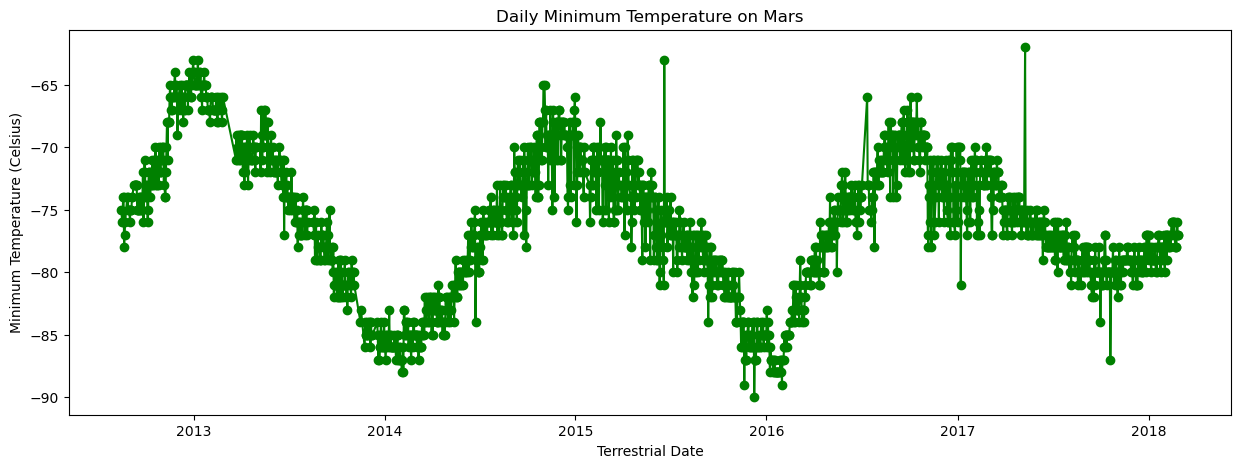

Estimated Martian year in terrestrial days: 365 days


In [10]:
# About how many terrestrial (Earth) days exist in a Martian year?
# Visual plot
plt.figure(figsize=(15, 5))
plt.plot(df['terrestrial_date'], df['min_temp'], marker='o', linestyle='-', color='green')
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Terrestrial Date')
plt.ylabel('Minimum Temperature (Celsius)')
plt.show()

# Calculate the duration in terrestrial days
start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2023-01-01')

terrestrial_days_in_martian_year = (end_date - start_date).days
print(f"Estimated Martian year in terrestrial days: {terrestrial_days_in_martian_year} days")


In [11]:
# Export DataFrame to a CSV file
csv_filename = 'mars_weather_data.csv'
df.to_csv(csv_filename, index=False)

print(f"DataFrame exported to '{csv_filename}'.")


DataFrame exported to 'mars_weather_data.csv'.
